## DS https://www.kaggle.com/datasets/thedevastator/canine-intelligence-and-size?select=dog_intelligence.csv

#### Making observations and classifications


In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import roc_curve, roc_auc_score, auc, recall_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [29]:
df1 = pd.read_csv("AKC Breed Info.csv", index_col="Breed")
df2 = pd.read_csv("dog_intelligence.csv",index_col="Breed")

In [30]:
df1.head()

,index,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
Breed,,,,,
Akita,0,26,28,80,120
Anatolian Sheepdog,1,27,29,100,150
Bernese Mountain Dog,2,23,27,85,110
Bloodhound,3,24,26,80,120
Borzoi,4,26,28,70,100


In [66]:
df = pd.concat([df2, df1], axis=1)
df.head()

,index,Classification,obey,reps_lower,reps_upper,index,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
Border Collie,0.0,Brightest Dogs,95%,1.0,4.0,60.0,19,21,40,40
Poodle,1.0,Brightest Dogs,95%,1.0,4.0,NaN,NaN,NaN,NaN,NaN
German Shepherd,2.0,Brightest Dogs,95%,1.0,4.0,NaN,NaN,NaN,NaN,NaN
Golden Retriever,3.0,Brightest Dogs,95%,1.0,4.0,40.0,21,24,55,75
Doberman Pinscher,4.0,Brightest Dogs,95%,1.0,4.0,33.0,26,28,60,100


In [67]:
df = df.drop(["index"], axis = 1)
df.head()

,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
Border Collie,Brightest Dogs,95%,1.0,4.0,19,21,40,40
Poodle,Brightest Dogs,95%,1.0,4.0,NaN,NaN,NaN,NaN
German Shepherd,Brightest Dogs,95%,1.0,4.0,NaN,NaN,NaN,NaN
Golden Retriever,Brightest Dogs,95%,1.0,4.0,21,24,55,75
Doberman Pinscher,Brightest Dogs,95%,1.0,4.0,26,28,60,100


In [68]:
df.isnull().sum()

Classification        45
obey                  56
reps_lower            45
reps_upper            45
height_low_inches     31
height_high_inches    31
weight_low_lbs        31
weight_high_lbs       31
dtype: int64

In [91]:
df["Classification"] = df.index.astype('category')  ### Change categorical column to numerial
df["Classification"] = df["Classification"].cat.codes
df['obey'] = df['obey'].str.rstrip("%").astype(float)/100

In [84]:
df=df.reset_index()
df.rename({'index': 'Breed'}, axis=1, inplace=True)
df

,Breed,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,Border Collie,31,95%,1.0,4.0,19,21,40,40
1,Poodle,138,95%,1.0,4.0,NaN,NaN,NaN,NaN
2,German Shepherd,80,95%,1.0,4.0,NaN,NaN,NaN,NaN
3,Golden Retriever,86,95%,1.0,4.0,21,24,55,75
4,Doberman Pinscher,65,95%,1.0,4.0,26,28,60,100
...,...,...,...,...,...,...,...,...,...
176,Shetland Sheepdog (Sheltie),156,NaN,NaN,NaN,13,16,14,20
177,Silky Terrier,160,NaN,NaN,NaN,9,10,8,11
178,Manchester Terrier (Toy),114,NaN,NaN,NaN,10,12,6,8
179,Poodle Toy,141,NaN,NaN,NaN,10,10,10,10


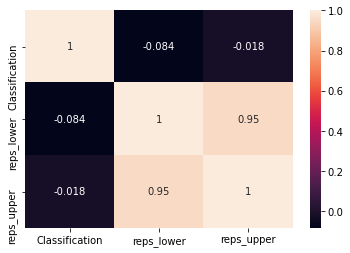

In [85]:
sn.heatmap(df.corr(),annot=True)

In [92]:
df.head()
#df['Classification'].corr(df['obey'])

-0.9679497379594515

#### The dataset needs cleaning up -> NaNs sorted, upper/lower limits normalized etc before any ML can be used. 

###### Objectives: Predict the Breed /  Classification / obey rate based on params.
###### Observe cor between the values -> does a taller dog listen more etc. 